<h1> <center> Pneumonia Detection </center></h1>

## Data Source -:https://www.kaggle.com/parthachakraborty/pneumonia-chest-x-ray


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import pickle

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras import models
from keras import layers
from keras import optimizers

from keras import applications
from keras.optimizers import Adam
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import keras
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
df=pd.read_csv('/content/drive/My Drive/Pneumonia/All/GTruth.csv')
df.head()

,Id,Ground_Truth
0,643781546,1
1,540270208,0
2,585452583,1
3,341665171,0
4,940983956,1


In [6]:
df['Ground_Truth'].value_counts()

1    4273
0    1583
Name: Ground_Truth, dtype: int64

In [7]:
kv_dict= dict(zip(df['Id'].values,df['Ground_Truth'].values))
kv_dict

{643781546: 1,
 540270208: 0,
 585452583: 1,
 341665171: 0,
 940983956: 1,
 351876904: 0,
 833529062: 0,
 65354019: 1,
 864873088: 1,
 261031442: 0,
 391277389: 0,
 749354161: 1,
 269118795: 0,
 38909281: 1,
 255411092: 1,
 693759901: 0,
 221912234: 1,
 200725658: 1,
 794538028: 1,
 605689867: 0,
 422941988: 1,
 485016781: 0,
 336196931: 1,
 154471781: 1,
 83351054: 0,
 355920256: 0,
 427807999: 1,
 774938683: 1,
 345755509: 0,
 204292657: 1,
 313025667: 0,
 234259238: 1,
 21335482: 0,
 599260779: 1,
 785725781: 1,
 29100641: 1,
 62322510: 0,
 126945057: 0,
 12300583: 1,
 603627132: 0,
 371015170: 0,
 125920418: 1,
 821093472: 1,
 211188056: 1,
 123464343: 0,
 697457186: 0,
 131206546: 1,
 283488682: 0,
 300543131: 1,
 323623474: 0,
 926674154: 1,
 95371153: 0,
 878645698: 1,
 492690172: 0,
 729554598: 1,
 17947132: 1,
 136754357: 0,
 940444465: 1,
 547551082: 0,
 945052599: 1,
 211431234: 1,
 904098070: 1,
 647732844: 1,
 686659192: 1,
 622207917: 0,
 586776405: 1,
 562213608: 1,
 609

In [0]:
#Reading Image data and converting it into pixels and separating class labels
Data=[]
Label=[]
directory='/content/drive/My Drive/Pneumonia/All/'

for filename in os.listdir(directory) :
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        
        Label.append(kv_dict.get(int(filename.split('.')[0])))
        filename=os.path.join(directory, filename)
        im=image.load_img(filename,target_size=(224, 224))
        im=np.reshape(im,(224,224,3))
        im=im.astype('float32') / 255
        Data.append(im)
    else:
        continue    

In [0]:
#Train Test Split
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(Label), test_size=0.2, random_state=42,stratify=Label)

#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [14]:
X_train.shape

(4684, 224, 224, 3)

In [15]:
X_cv.shape

(937, 224, 224, 3)

In [16]:
X_test.shape

(235, 224, 224, 3)

In [0]:
img_width=X_train.shape[1]
img_height=X_train.shape[1]

In [0]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)
    

In [0]:
del Data

In [0]:
#Function to Plott train and Test loss

def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label='Validation Loss')
  ax.plot(x,ty,'r',label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [0]:
#Variables defined
epoch=10
batch=32
num_classes=1

<h2> Convolutional Model </h2>

In [22]:
#Model Defining
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape,
                kernel_initializer='he_normal'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid',kernel_initializer='glorot_normal'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [23]:
#Model Compile
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train
#training = model.fit_generator(generator.flow(X_train,y_train, batch_size=batch)
                              #,epochs=epoch
                               # ,validation_data=[X_cv, y_cv]
                                #,steps_per_epoch=10,verbose=1)
his=model.fit(X_train,y_train,batch_size=batch,epochs=epoch,verbose=1,validation_data=(X_cv,y_cv))



Instructions for updating:
Use tf.cast instead.
Train on 4684 samples, validate on 937 samples
Epoch 1/10
4684/4684 [==============================] - 23s 5ms/step - loss: 0.7718 - acc: 0.6159 - val_loss: 0.5304 - val_acc: 0.7300
Epoch 2/10
4684/4684 [==============================] - 17s 4ms/step - loss: 0.4209 - acc: 0.8106 - val_loss: 0.5767 - val_acc: 0.7524
Epoch 3/10
4684/4684 [==============================] - 17s 4ms/step - loss: 0.2487 - acc: 0.9061 - val_loss: 0.1928 - val_acc: 0.9381
Epoch 4/10
4684/4684 [==============================] - 17s 4ms/step - loss: 0.2034 - acc: 0.9268 - val_loss: 0.1874 - val_acc: 0.9200
Epoch 5/10
4684/4684 [==============================] - 17s 4ms/step - loss: 0.2033 - acc: 0.9257 - val_loss: 0.1880 - val_acc: 0.9104
Epoch 6/10
4684/4684 [==============================] - 17s 4ms/step - loss: 0.1709 - acc: 0.9372 - val_loss: 0.1570 - val_acc: 0.9413
Epoch 7/10
4684/4684 [==============================] - 17s 4ms/step - loss: 0.1636 - acc: 0.94

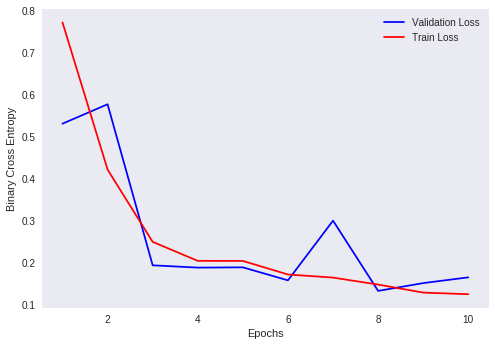

In [24]:
#Plotting Train and Validation Loss
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Binary Cross Entropy')

x=list(range(1,epoch+1))

vy=his.history['val_loss']
ty=his.history['loss']
plt_dynamic(x,vy,ty,ax)

In [25]:
#Test Accuracy
score=model.evaluate(X_test,y_test,verbose=0)
print("The test accuracy for the model is %f "%(score[1]*100))

The test accuracy for the model is 96.170213 


In [0]:
y_pred=model.predict(X_test).round()

Text(0.5, 1.0, 'Confusion Matrix')

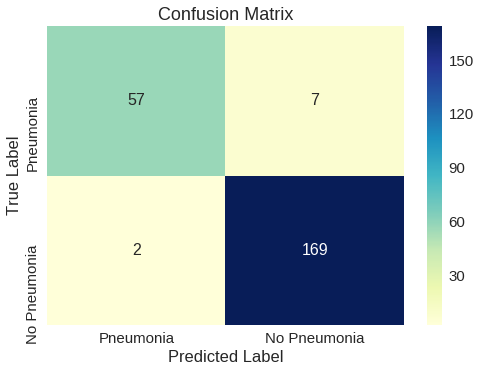

In [31]:
#Plotting Confusion Matrix
x=confusion_matrix(y_test,y_pred)
Cm_df=pd.DataFrame(x,index=['Pneumonia','No Pneumonia'],columns=['Pneumonia','No Pneumonia'])

sns.set(font_scale=1.5,color_codes=True,palette='deep')
sns.heatmap(Cm_df,annot=True,annot_kws={'size':16},fmt='d',cmap='YlGnBu')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix')

<h1> Conclusion : </h1>

The accuracy of the  deep learning model is found to be 96.17 %. This accuracy can be increased further by fine tunning the layer.